# Цель лабораторной работы
Изучение различных методов визуализация данных и создание истории на основе данных.

# Задание
Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь.
Для лабораторных работ не рекомендуется выбирать датасеты очень большого размера.

Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:

1.История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.

2.На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
3.Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.

4.Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.

5.История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.


Сформировать отчет и разместить его в своем репозитории на github.

# Ход выполнения работы

## Текстовое описание набора данных

Набор данных, использованный в эксперименте, взят из статистики Всемирного банка за 2015 год.

Этот набор данных состоит из одного файла WorldIndex.csv, содержащего все данные датасета. Данный файл содержит следующие колонки:

+ Country--названия стран мира  
+ Continent--континент, на котором расположена страна
+ Life_expectancy--ожидаемая продолжительность жизни	
+ GDP_per_capita--ВВП на душу населения
+ Population--население страны

# Основные характеристики набора данных
Подключим все необходимые библиотеки:

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Импорт набора данных и просмотр

In [4]:
data=pd.read_csv('WorldIndex.csv')
data.head()

,Country,Continent,Life_expectancy,GDP_per_capita,Population
0,Algeria,Africa,75.042537,4132.760292,39871528.0
1,Angola,Africa,52.666098,3695.793748,27859305.0
2,Benin,Africa,59.720707,783.947091,10575952.0
3,Botswana,Africa,64.487415,6532.060501,2209197.0
4,Burundi,Africa,57.107049,303.681022,10199270.0


Проверьте соответствующую информацию набора данных

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          177 non-null    object 
 1   Continent        177 non-null    object 
 2   Life_expectancy  169 non-null    float64
 3   GDP_per_capita   169 non-null    float64
 4   Population       176 non-null    float64
dtypes: float64(3), object(2)
memory usage: 7.0+ KB


Простая обработка набора данных, удаление элементов с отсутствующими данными

In [7]:
df=data.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 175
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          164 non-null    object 
 1   Continent        164 non-null    object 
 2   Life_expectancy  164 non-null    float64
 3   GDP_per_capita   164 non-null    float64
 4   Population       164 non-null    float64
dtypes: float64(3), object(2)
memory usage: 7.7+ KB


Переименуйте столбцы набора данных и нарисуйте гистограмму ожидаемой продолжительности жизни в мире.

In [8]:
df.columns = ['country', 'continent', 'life', 'gdp', 'popu']

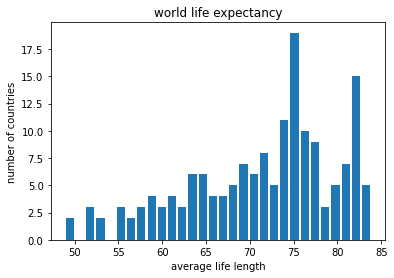

In [19]:
plt.hist(df.life,bins=30,rwidth=0.8)
plt.xlabel('average life length')
plt.ylabel('number of countries')
plt.title('world life expectancy')
plt.show()

Очевидно, что:  
В наибольшем числе стран ожидаемая продолжительность жизни составляет около 75 лет, за ними следуют 82 года.

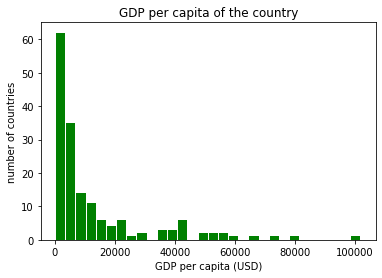

In [18]:
plt.hist(df.gdp,bins=30,rwidth=0.9,color='green')

plt.xlabel('GDP per capita (USD)')
plt.ylabel('number of countries')
plt.title('GDP per capita of the country')
plt.show()

Видно, что:   
Количество стран в мире с ВВП на душу населения от 1000 до 2000 долларов по-прежнему остается самым большим, но в то же время уже есть страны с ВВП на душу населения, достигающим 100 000 долларов.

Теперь давайте посмотрим на количество стран на каждом континенте и посмотрим на их долю в мире.

In [20]:
conti_count=df.continent.value_counts()
conti_count

Africa           48
Europe           41
Asia             36
North America    19
South America    11
Oceania           9
Name: continent, dtype: int64

In [21]:
conti=list(conti_count.index)
conti

['Africa', 'Europe', 'Asia', 'North America', 'South America', 'Oceania']

In [22]:
x=np.arange(len(conti))
x

array([0, 1, 2, 3, 4, 5])

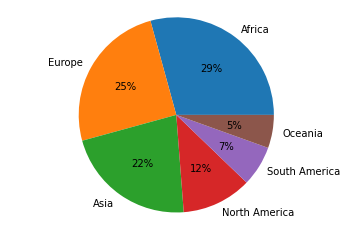

In [23]:
plt.pie(conti_count,labels=conti,autopct='%1.lf%%')
plt.axis('equal')
plt.show()

В Африке больше всего стран в мире, за ней следует Европа, а затем Азия.

Теперь посмотрите на ожидаемую продолжительность жизни и ВВП на душу населения по континентам.

ValueError: Dimensions of labels and X must be compatible

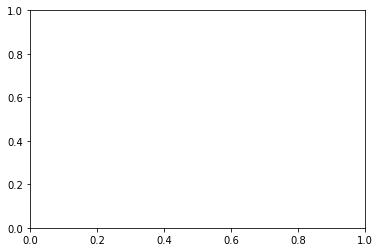

In [25]:
plt.boxplot(df.life,notch=True,labels=conti,meanline=True)
plt.show()

Начал использовать plt.boxplot для рисования коробчатых диаграмм, но обнаружил, что группировка не может быть выполнена, вам нужно сначала разделить групповые классы самостоятельно.Затем используйте seaborn, который может указать значения x, y для рисования.

<AxesSubplot:xlabel='continent', ylabel='life'>

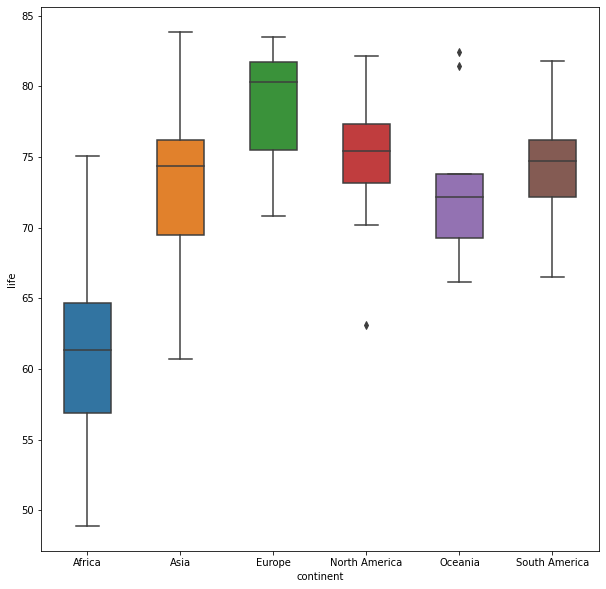

In [42]:
plt.figure(figsize=(10,10))
sns.boxplot(x='continent',y='life',data=df,width=0.5)

<AxesSubplot:xlabel='continent', ylabel='gdp'>

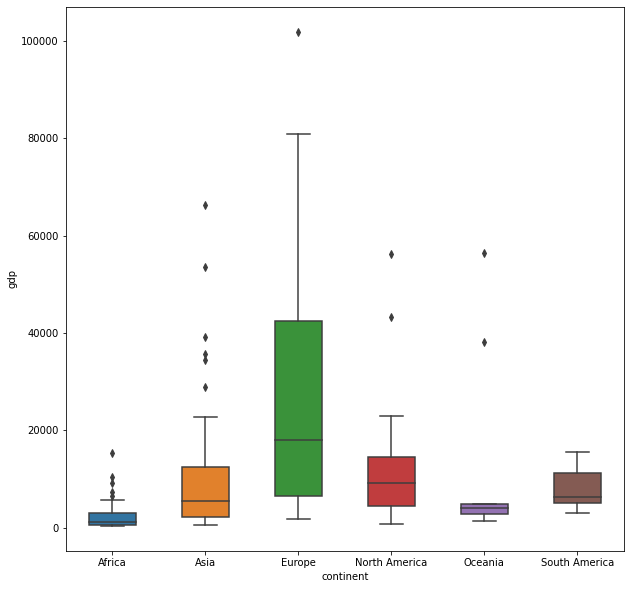

In [43]:
plt.figure(figsize=(10,10))
sns.boxplot(x='continent',y='gdp',data=df,width=0.5)

Всесторонний анализ ящичковых диаграмм ВВП на душу населения и ожидаемой продолжительности жизни показывает, что в Африке самые низкие показатели ВВП на душу населения и ожидаемой продолжительности жизни, а в Европе самые высокие ВВП на душу населения и ожидаемая продолжительность жизни.

Теперь выполните корреляционный анализ набора данных и нарисуйте матричный график.

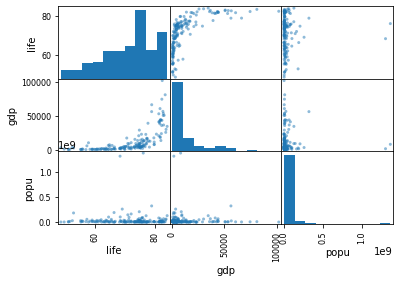

In [50]:
pd.plotting.scatter_matrix(df)
plt.show()

Можно видеть, что нет корреляции между населением, ожидаемой продолжительностью жизни и ВВП на душу населения, в то время как ожидаемая продолжительность жизни и ВВП имеют положительную корреляцию, и для них построены графики рассеяния.

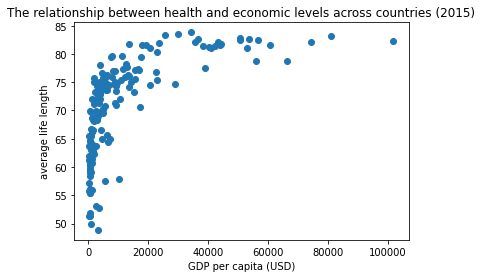

In [52]:
plt.scatter(df.gdp,df.life)
plt.title('The relationship between health and economic levels across countries (2015)')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('average life length')
plt.show()

Логарифмически преобразуйте горизонтальную ось диаграммы рассеяния и сделайте размер точек данных пропорциональным численности населения, добавив разные цвета для разных континентов, чтобы получить обработанную диаграмму рассеяния ниже.

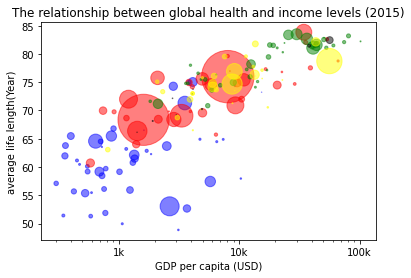

In [53]:
map_dict = {      
    'Asia':'red',
    'Europe':'green',
    'Africa':'blue',
    'North America':'yellow',
    'South America':'yellow',
    'Oceania':'black'
}
colors = df.continent.map(map_dict)   

size = df.popu / 1e6 * 2
plt.scatter(x=df.gdp, y=df.life, s=size, c=colors, alpha=0.5)  
plt.xscale('log')

plt.xlabel('GDP per capita (USD)')
plt.ylabel('average life length(Year)')
plt.title('The relationship between global health and income levels (2015)')

tick_val = [1000,10000,100000]
tick_lab = ['1k','10k','100k']
plt.xticks(tick_val, tick_lab)
plt.show()

Видно, что в Азии проживает подавляющее большинство населения мира, и ВВП на душу населения также находится на среднем уровне. Африка занимает второе место в мире по численности населения, но ее ВВП на душу населения является самым низким в мире. Судя по предыдущей круговой диаграмме с номерами стран, можно сделать вывод, что слишком много стран могут повлиять на развитие всей Африки. Если есть другие наборы данных, их можно изучить более подробно. Европа и Америка являются местом сбора развитых стран мира.Предполагается, что малочисленность населения и высокий уровень ВВП на душу населения значительно улучшают качество жизни людей и влияют на продолжительность жизни. 